## Compute elastic impedance and normalized elastic impedance

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import impedance as ip
%matplotlib inline

### Elastic properties for AVO classes
The cell below defines the elastic properties for AVO classes compiled by [Alessandro del Monte](http://nbviewer.ipython.org/github/aadm/geophysical_notes/blob/master/avo_explorer_v2_mono.ipynb). Originally, Class IV is from Castagna & Swan (1997) "Principles of AVO crossplotting" (1997) and the others from Hilterman (2001) "Seismic Amplitude Interpretation".

In [7]:
shale = np.array([[3094,1515,2.40], [2643,1167,2.29], [2192,818,2.16], [3240,1620,2.34]])
sandgas = np.array([[4050,2526,2.21], [2781,1665,2.08], [1542,901,1.88], [1650,1090,2.07]])
sandbrine = np.array([[4115,2453,2.32], [3048,1595,2.23], [2134,860,2.11], [2590,1060,2.21]])
avocl=['Class I','Class II','Class III','Class IV']

angle = 30

#### The properties will generate the logs

In [8]:
vp=np.zeros(5) + shale[0,0]
vs = np.zeros(5) + shale[0,1]
rho = np.zeros(5) + shale[0,2]
for i in range (len(avocl)):
    vp1 = np.zeros(100) + shale[i,0] #m/s
    vs1 = np.zeros(100) + shale[i,1]
    rho1 = np.zeros(100) + shale[i,2] #g/cc
    vp2 = np.zeros(100) + sandgas[i,0]
    vs2 = np.zeros(100) + sandgas[i,1] #m/s
    rho2 = np.zeros(100) + sandgas[i,2] #g/cc
    vp3 = np.zeros(100) + sandbrine[i,0]
    vs3 = np.zeros(100) + sandbrine[i,1] #m/s
    rho3 = np.zeros(100) + sandbrine[i,2] #g/cc

    vp=np.concatenate((vp,vp1,vp2,vp1,vp3))
    vs=np.concatenate((vs,vs1,vs2,vs1,vs3))
    rho=np.concatenate((rho,rho1,rho2,rho1,rho3))
    
vp += np.random.normal(0, np.max(np.abs(vp))*0.005, len(vp))
vs += np.random.normal(0, np.max(np.abs(vs))*0.005, len(vs))
rho += np.random.normal(0, np.max(np.abs(rho))*0.1, len(rho.shape))

vpvs=vp/vs
#poisson ratio
pr=0.5*((vpvs**2-2)/(vpvs**2-1))

ai=ip.ai(vp,rho) # acoustic impedance
ei=ip.ei(vp,vs,rho,angle) # elastic impedance
nei=ip.nei(vp,vs,rho,shale[2,0],shale[2,1],shale[2,2],angle) # normalized elastic impedance

### Plot the logs

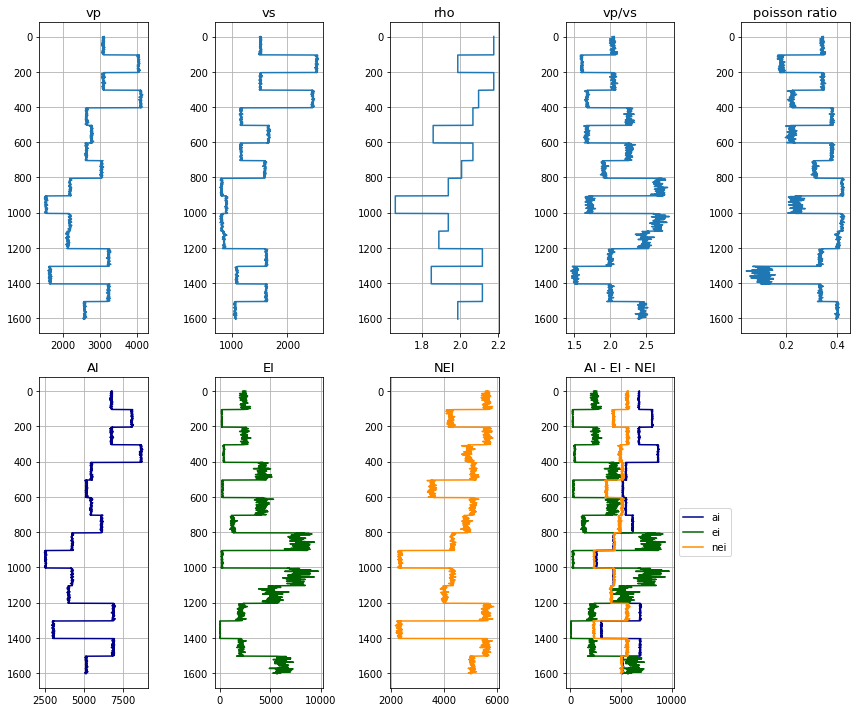

In [9]:
fig=plt.figure(figsize=(12,10))

ax=plt.subplot(2,5,1)
plt.title('vp',fontsize=13)
plt.plot(vp,np.arange(vp.shape[0]))
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,5,2)
plt.title('vs',fontsize=13)
plt.plot(vs,np.arange(vs.shape[0]))
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,5,3)
plt.title('rho',fontsize=13)
plt.plot(rho,np.arange(rho.shape[0]))
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,5,4)
plt.title('vp/vs',fontsize=13)
plt.plot(vpvs,np.arange(vpvs.shape[0]))
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,5,5)
plt.title('poisson ratio',fontsize=13)
plt.plot(pr,np.arange(pr.shape[0]))
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,5,6)
plt.title('AI',fontsize=13)
plt.plot(ai,np.arange(ai.shape[0]),color='darkblue')
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,5,7)
plt.title('EI',fontsize=13)
plt.plot(ei,np.arange(ei.shape[0]),color='darkgreen')
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,5,8)
plt.title('NEI',fontsize=13)
plt.plot(nei,np.arange(nei.shape[0]),color='darkorange')
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,5,9)
plt.title('AI - EI - NEI',fontsize=13)
plt.plot(ai,np.arange(ai.shape[0]),label='ai',color='darkblue')
plt.plot(ei,np.arange(ei.shape[0]),label='ei',color='darkgreen')
plt.plot(nei,np.arange(nei.shape[0]),label='nei',color='darkorange')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.invert_yaxis()
plt.grid(True)

plt.tight_layout()

### Crossplots

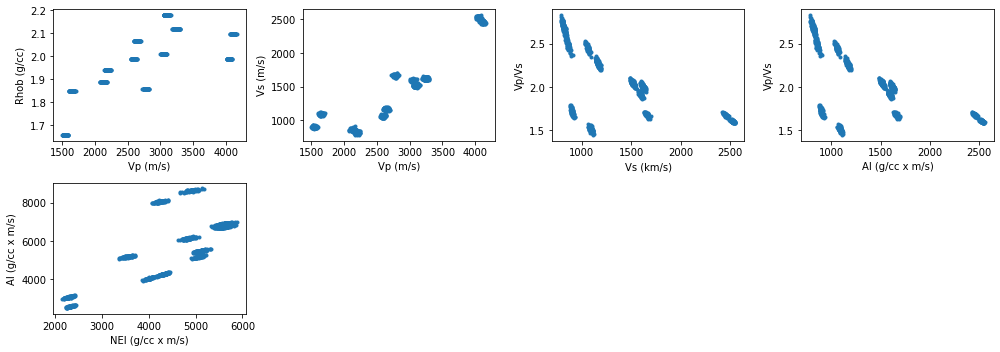

In [10]:
fig=plt.figure(figsize=(14,5))

ax=plt.subplot(2,4,1)
plt.plot(vp,rho,'.')
ax.set_xlabel('Vp (m/s)')
ax.set_ylabel('Rhob (g/cc)')

ax=plt.subplot(2,4,2)
plt.plot(vp,vs,'.')
ax.set_xlabel('Vp (m/s)')
ax.set_ylabel('Vs (m/s)')

ax=plt.subplot(2,4,3)
plt.plot(vs,vpvs,'.')
ax.set_xlabel('Vs (km/s)')
ax.set_ylabel('Vp/Vs')

ax=plt.subplot(2,4,4)
plt.plot(vs,vpvs,'.')
ax.set_xlabel('AI (g/cc x m/s)')
ax.set_ylabel('Vp/Vs')

ax=plt.subplot(2,4,5)
plt.plot(nei,ai,'.')
ax.set_xlabel('NEI (g/cc x m/s)')
ax.set_ylabel('AI (g/cc x m/s)')

plt.tight_layout()

### References:

Connolly, P., 1999, Elastic impedance: The Leading Edge, 18, 438–452.

Hilterman, F. J., 2001. Seismic amplitude interpretation: 2001 distinguished instructor short course (No. 4). SEG Books.

Whitcombe, D, 2002, Elastic impedance normalization, Geophysics, 67 (1), 60–62.
 
https://github.com/aadm/avo_explorer